In [24]:
# r√©cuperer le fichier de donn√©es brutes dans un dataframe nomm√© df
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv('weatherAUS.csv')
#afficher les 10 premi√®re lignes
df.head(10)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
5  2008-12-06   Albury     14.6     29.7       0.2          NaN       NaN   
6  2008-12-07   Albury     14.3     25.0       0.0          NaN       NaN   
7  2008-12-08   Albury      7.7     26.7       0.0          NaN       NaN   
8  2008-12-09   Albury      9.7     31.9       0.0          NaN       NaN   
9  2008-12-10   Albury     13.1     30.1       1.4          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   
5         WNW           56.0          W  ...        55.0         23.0   
6           W           50.0         SW  ...        49.0         19.0   
7           W           35.0        SSE  ...        48.0         19.0   
8         NNW           80.0         SE  ...        42.0          9.0   
9           W           28.0          S  ...        58.0         27.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   
5       1009.2       1005.4       NaN       NaN     20.6     28.9         No   
6       1009.6       1008.2       1.0       NaN     18.1     24.6         No   
7       1013.4       1010.1       NaN       NaN     16.3     25.5         No   
8       1008.9       1003.6       NaN       NaN     18.3     30.2         No   
9       1007.0       1005.7       NaN       NaN     20.1     28.2        Yes   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  
5            No  
6            No  
7            No  
8           Yes  
9            No  

[10 rows x 23 columns]

In [2]:
#% de valeurs nulles dans chaque variable
Val_nulles = pd.DataFrame({f"% NaN" : df.isna().sum()/145460*100}, index = df.columns)
Val_nulles["% NaN"] = Val_nulles["% NaN"].round(2)
Val_nulles

% NaN
Date            0.00
Location        0.00
MinTemp         1.02
MaxTemp         0.87
Rainfall        2.24
Evaporation    43.17
Sunshine       48.01
WindGustDir     7.10
WindGustSpeed   7.06
WindDir9am      7.26
WindDir3pm      2.91
WindSpeed9am    1.21
WindSpeed3pm    2.11
Humidity9am     1.82
Humidity3pm     3.10
Pressure9am    10.36
Pressure3pm    10.33
Cloud9am       38.42
Cloud3pm       40.81
Temp9am         1.21
Temp3pm         2.48
RainToday       2.24
RainTomorrow    2.25

Les variables peuvent √™tre divis√©es en 2 groupes : 

- Celles qui ont moins de 5% de NaN. 

**Pour celles l√† on peut raisonnablement supprimer les lignes concern√©es sans perdre trop de donn√©es**

- Celles qui ont plus de 5% de NaN.

**Pour celles l√† il serait mieux de remplacer les valeurs manquantes par une valeur coh√©rente. La question est donc par quelle valeur remplacer et comment l'obtenir?** 
    
Il parraitrait logique que les param√®tres m√©t√©os soient li√©s les uns les autres et qu'on puisse pr√©dire, au moins partiellement, un param√®tre √† partir d'un autre. On va donc verifier cet hypoth√®se.

Pour cela on va s√©parer les variables avec plus de 5% de NaN en 2 groupes:

- Les variables quantitatives
- Les variables cat√©gorielles
    

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736555  0.103938     0.466993  0.072586   
MaxTemp        0.736555  1.000000 -0.074992     0.587932  0.470156   
Rainfall       0.103938 -0.074992  1.000000    -0.064351 -0.227549   
Evaporation    0.466993  0.587932 -0.064351     1.000000  0.365602   
Sunshine       0.072586  0.470156 -0.227549     0.365602  1.000000   
WindGustSpeed  0.177415  0.067615  0.133659     0.203021 -0.034750   
WindSpeed9am   0.175064  0.014450  0.087338     0.193084  0.005499   
WindSpeed3pm   0.175173  0.050300  0.057887     0.129400  0.053834   
Humidity9am   -0.232899 -0.504110  0.224405    -0.504092 -0.490819   
Humidity3pm    0.006089 -0.508855  0.255755    -0.390243 -0.629130   
Pressure9am   -0.450970 -0.332061 -0.168154    -0.270362  0.041970   
Pressure3pm   -0.461292 -0.427167 -0.126534    -0.293581 -0.019719   
Cloud9am       0.078754 -0.289370  0.198528    -0.183793 -0.675323   
Cloud3pm       0.021605 -0.277921  0.172403    -0.182618 -0.703930   
Temp9am        0.901821  0.887210  0.011192     0.545115  0.291188   
Temp3pm        0.708906  0.984503 -0.079657     0.572893  0.490501   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.177415      0.175064      0.175173    -0.232899   
MaxTemp             0.067615      0.014450      0.050300    -0.504110   
Rainfall            0.133659      0.087338      0.057887     0.224405   
Evaporation         0.203021      0.193084      0.129400    -0.504092   
Sunshine           -0.034750      0.005499      0.053834    -0.490819   
WindGustSpeed       1.000000      0.605303      0.686307    -0.215070   
WindSpeed9am        0.605303      1.000000      0.519547    -0.270858   
WindSpeed3pm        0.686307      0.519547      1.000000    -0.145525   
Humidity9am        -0.215070     -0.270858     -0.145525     1.000000   
Humidity3pm        -0.026327     -0.031614      0.016432     0.666949   
Pressure9am        -0.458744     -0.228743     -0.296351     0.139442   
Pressure3pm        -0.413749     -0.175817     -0.255439     0.186858   
Cloud9am            0.071736      0.025112      0.053337     0.452297   
Cloud3pm            0.109168      0.054639      0.025396     0.357326   
Temp9am             0.150150      0.128545      0.163030    -0.471354   
Temp3pm             0.032748      0.004569      0.027778    -0.498399   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.006089    -0.450970    -0.461292  0.078754  0.021605   
MaxTemp          -0.508855    -0.332061    -0.427167 -0.289370 -0.277921   
Rainfall          0.255755    -0.168154    -0.126534  0.198528  0.172403   
Evaporation      -0.390243    -0.270362    -0.293581 -0.183793 -0.182618   
Sunshine         -0.629130     0.041970    -0.019719 -0.675323 -0.703930   
WindGustSpeed    -0.026327    -0.458744    -0.413749  0.071736  0.109168   
WindSpeed9am     -0.031614    -0.228743    -0.175817  0.025112  0.054639   
WindSpeed3pm      0.016432    -0.296351    -0.255439  0.053337  0.025396   
Humidity9am       0.666949     0.139442     0.186858  0.452297  0.357326   
Humidity3pm       1.000000    -0.027544     0.051997  0.517120  0.523120   
Pressure9am      -0.027544     1.000000     0.961326 -0.129796 -0.147861   
Pressure3pm       0.051997     0.961326     1.000000 -0.060772 -0.084778   
Cloud9am          0.517120    -0.129796    -0.060772  1.000000  0.603564   
Cloud3pm          0.523120    -0.147861    -0.084778  0.603564  1.000000   
Temp9am          -0.221019    -0.422556    -0.470187 -0.136959 -0.126659   
Temp3pm          -0.557841    -0.286770    -0.389548 -0.302060 -0.317420   

                Temp9am   Temp3pm  
MinTemp        0.901821  0.708906  
MaxTemp        0.887210  0.984503  
Rainfall       0.011192 -0.079657  
Evaporation    0.545115  0.572893  
Sunshine       0.291188  0.490501  
WindGustSpeed  0.150150  0.032748  
WindSpeed9am   0.128545  0.004569  
Wi

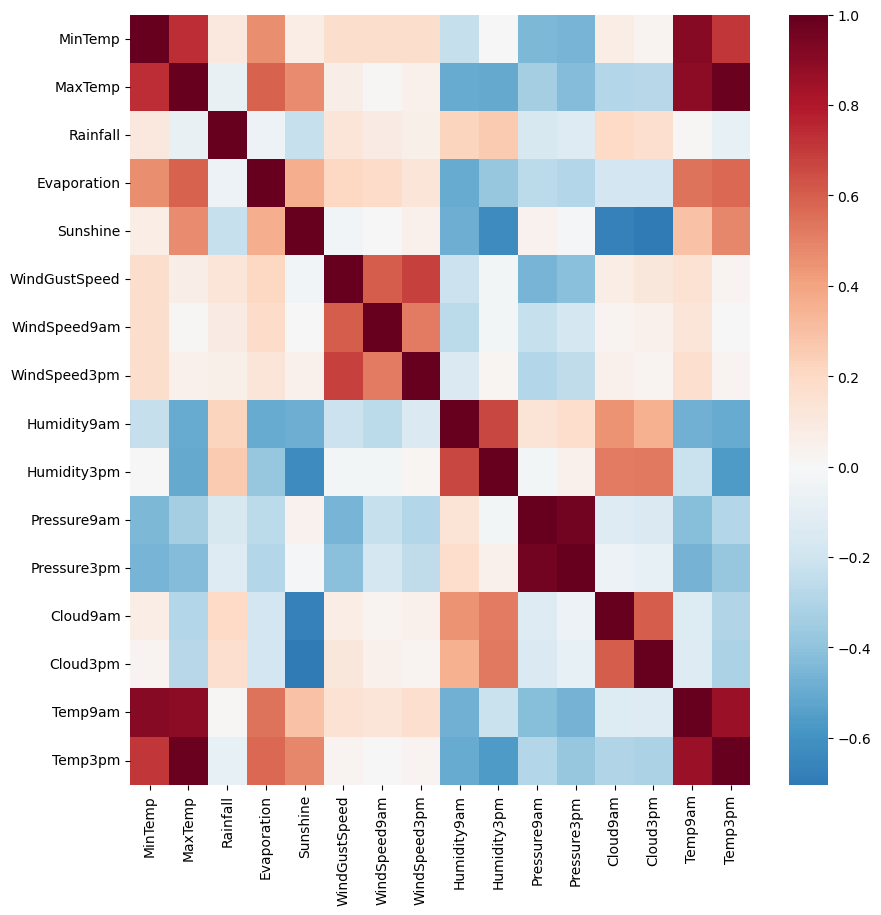

In [4]:
#on retire les variables cat√©gorielles du jeu de donn√©e
df_corr = df.drop(['Date','Location', 'WindDir9am', 'WindDir3pm','RainToday','WindGustDir', 'RainTomorrow'],axis = 1)

#On calcule la matrice de correlation et on la visualise √† l'aide d'une heatmap
fig = plt.figure(figsize=(10, 10))
sns.heatmap(df_corr.corr(), cmap='RdBu_r', center=0);
df_corr.corr()

On observe des groupes de variables fortement corr√©l√©es entre elles :

- Les 4 variables temp√©ratures MinTemp, MaxTemp,Temp9am et Temp3pm sont correl√©es √† hauteur de 70% minimum et jusqu'√† 90% donc une correlation tr√®s forte
- Les 3 variables de vitesse de vent WindGustSpeed, WindSpeed9am, WindSpeed3pm √† hauteur de 50% minimum et jusqu'√† un peu moins de 70% docnc une correlation forte
- Les 2 variable d'humidit√© Humidity9am et Humidity3pm sont correll√©es entre elle √† hauteur de 66%
- Les 2 variables de pression, Pressure9am et Pressure3pm sont tr√®s fortement corr√©l√©e, √† hauteur de 96%
- Les 2 variables de couverture nuageuse, Cloud9am et Cloud3pm sont corr√©l√©es √† hauteur de 60%

> √† l'√©tape de machine learning il faudra voir s'il est possible/utile de synth√©tiser chacun de ces groupes en une seule variable

Il y a t'il des relations qui puissent √™tre employ√©es pour gerer des NaN?
> Peut on predire la valeur  d'une variable avec beaucoup de Nan √† partir d'une ou plusieurs variables avec peu de Nan?

Quelles sont les variables avec beaucoup de NaN?
- La variable Sunshine avec presque 50% de NaN
- La variable Evaporation avec ~40% de NaN
- Les 2 variables de couverture nuageuse, Cloud9am et Cloud3pm avec ~40% de NaN
- Les 2 variables de pression, Pressure9am et Pressure3pm avec ~10% de NaN
- La variable WindGustSpeed avec ~7% de NaN

Prenons chaque variables ou groupe de variables riches en NaN au cas par cas en 

>Commen√ßons par Sunshine :

Il y a une correlation de ~55% avec les temperatures et de ~40 % avec les humidit√©s

c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

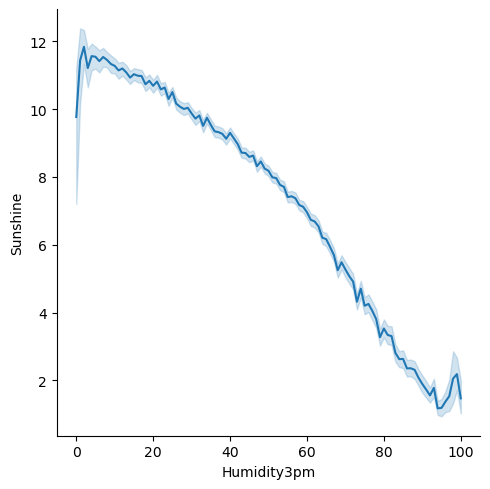

In [5]:
#plot des relations avec ces variables :

fig = plt.figure(figsize=(7, 7))
sns.relplot( x = 'Temp9am',y = 'Sunshine', data = df, kind ='line')
plt.xlabel('Temp9am')
plt.ylabel('Sunshine');

fig = plt.figure(figsize=(7, 7))
sns.relplot(x = 'Humidity3pm',y = 'Sunshine', data = df, kind ='line')
plt.xlabel('Humidity3pm')
plt.ylabel('Sunshine');

Un mod√®le lin√©aire satisfaisant devrait pouvoir √™tre √©tablit avec la variable Humidity3pm pour des humidit√©s entre 5 et 90%, le mod√®le devrait √™tre moins pr√©cis en dehors de ces humidit√©s.
> A quelles valeurs d'humidit√© sont plac√©es les NaN ?

In [16]:
#On s'interesse √† la repartition des valeurs d'humidit√© pour les modalit√©s manquantes de Sunshine'

fig = plt.figure(figsize=(20, 8))
hum_sun_nan = df['Humidity3pm'].loc[df['Sunshine'].isna()]
plt.hist(x = hum_sun_nan, bins = 50),
plt.title(f"Humidity3pm des valeurs de Sunshine manquantes");
plt.xlabel('Humidity3pm')
plt.ylabel('Counts')


Text(0, 0.5, 'Counts')

De mani√®re globale la grande majorit√© des Nan sont dans la gamme d'humidit√©s o√π le mod√®le sera tr√®s performant.
> Note pour plus tard: il va falloir s'interesser aux donn√©es avec 100% d'HR car cela correspond √† un air satur√© en humidit√© o√π devrait se former de l'eau liquide (et donc des nuages)


>Passons Maintenant √† la variable Evaporation:

Il y a une correlation de ~50% avec les temperatures et de ~60 % avec les humidit√©s

c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

<Figure size 700x700 with 0 Axes>

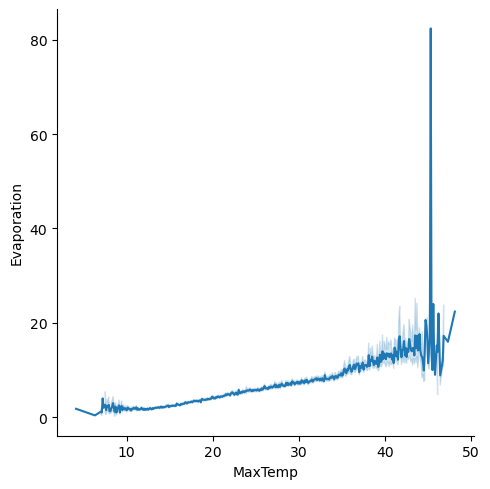

<Figure size 700x700 with 0 Axes>

In [8]:
#plot des relations avec ces variables :

fig = plt.figure(figsize=(7, 7))
sns.relplot( x = 'MaxTemp',y = 'Evaporation', data = df, kind ='line')
plt.xlabel('MaxTemp')
plt.ylabel('Evaporation');

fig = plt.figure(figsize=(7, 7))
sns.relplot(x = 'Humidity9am',y = 'Evaporation', data = df, kind ='line')
plt.xlabel('Humidity9am')
plt.ylabel('Evaporation');

L'humidit√© est ici aussi un bon candidat pour pr√©dire Evaporation, et l√† encore ce mod√®le serait moins performant pour des humidit√©s faibles <10-15%:

> A quelles valeurs d'humidit√© sont plac√©es les NaN ?

Text(0, 0.5, 'Counts')

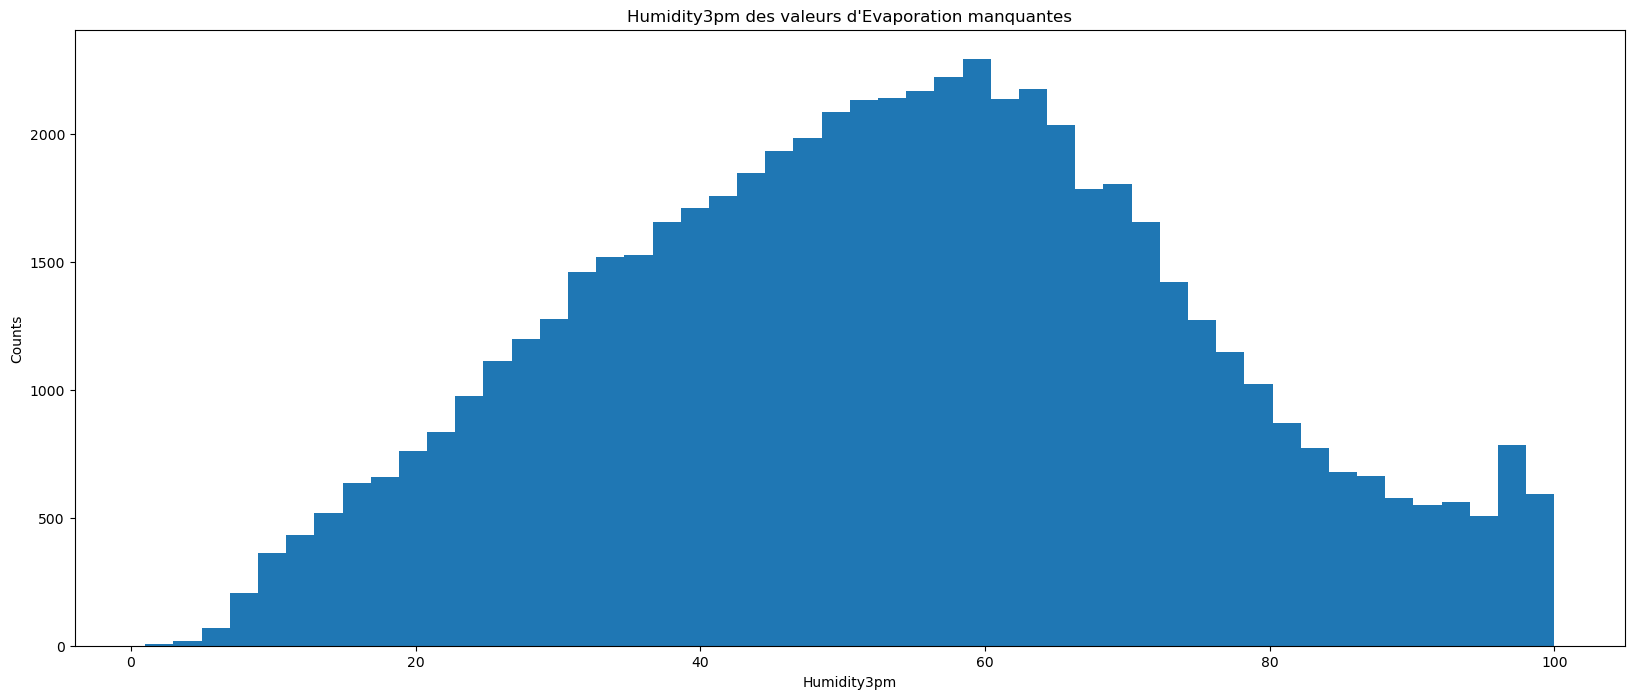

In [17]:
#On s'interesse √† la repartition des valeurs d'humidit√© pour les modalit√©s manquantes d'evaporation'

fig = plt.figure(figsize=(20, 8))
hum_evap_nan = df['Humidity3pm'].loc[df['Evaporation'].isna()]
plt.hist(x = hum_evap_nan, bins = 50),
plt.title(f"Humidity3pm des valeurs d'Evaporation manquantes");
plt.xlabel('Humidity3pm')
plt.ylabel('Counts')

De mani√®re globale la grande majorit√© des Nan sont dans la gamme d'humidit√©s o√π le mod√®le sera tr√®s performant.

>Passons maintenant aux variables Cloud repr√©sentant la couverture nuageuse:

Il y a une correlation de ~60 % avec les humidit√©s, autrement elles sont √©galement corr√©l√©e avec Sunshine qui a beaucoup de NaN √† hauteur de 67%

c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

Text(0, 0.5, 'Counts')

<Figure size 700x700 with 0 Axes>

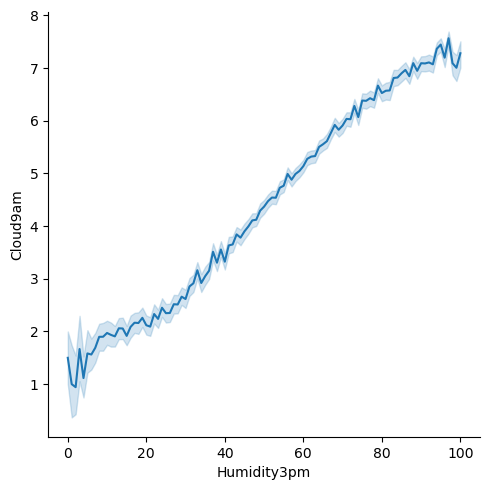

<Figure size 700x700 with 0 Axes>

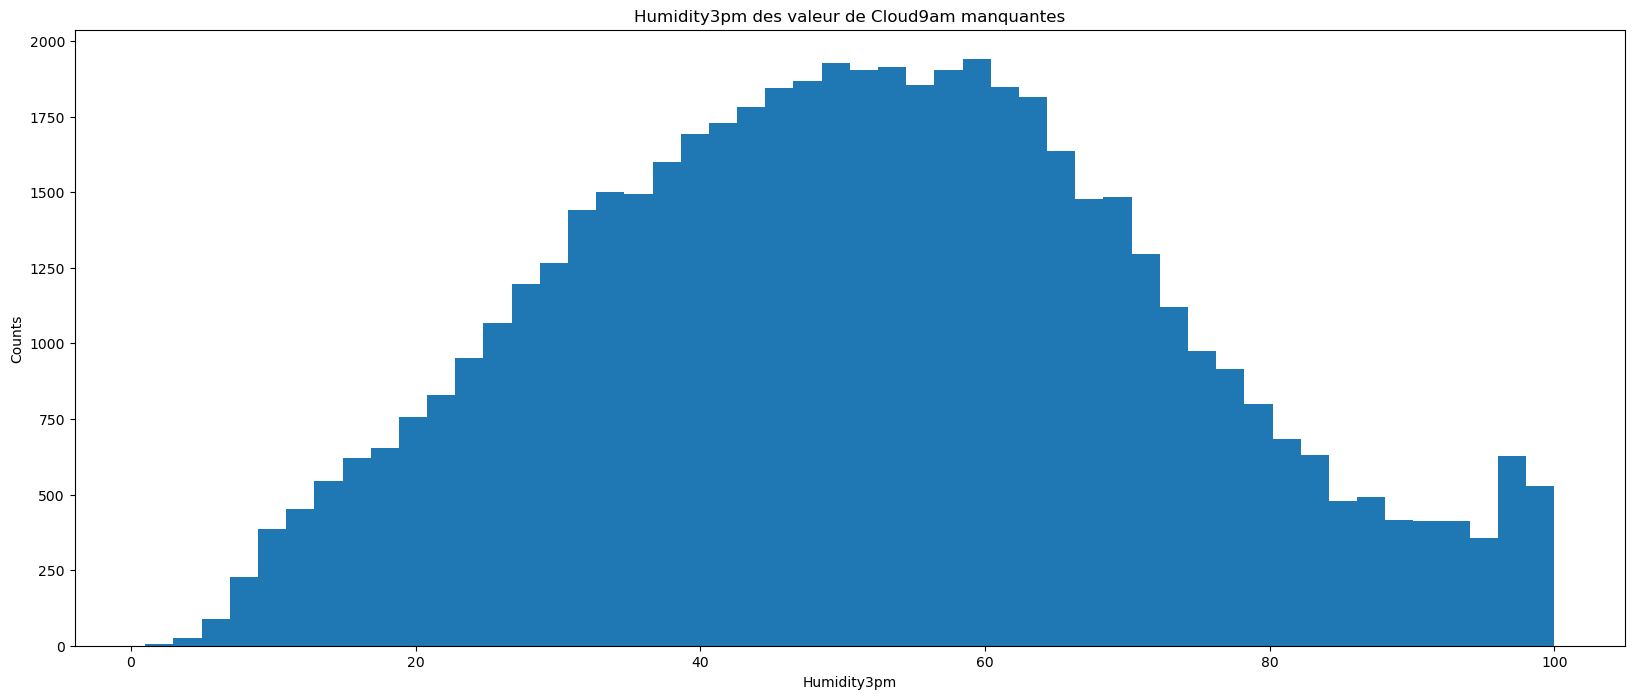

In [18]:
#plot des variables :

fig = plt.figure(figsize=(7, 7))
sns.relplot( x = 'Humidity3pm',y = 'Cloud9am', data = df, kind ='line')
plt.xlabel('Humidity3pm')
plt.ylabel('Cloud9am');

fig = plt.figure(figsize=(7, 7))
sns.relplot(x = 'Sunshine',y = 'Cloud9am', data = df, kind ='line')
plt.xlabel('Sunshine')
plt.ylabel('Cloud9am');

#On s'interesse √† la repartition des valeurs d'humidit√© pour les modalit√©s manquantes de pnuages

fig = plt.figure(figsize=(20, 8))
hum_clouda_nan = df['Humidity3pm'].loc[df['Cloud9am'].isna()]
plt.hist(x = hum_clouda_nan, bins = 50),
plt.title(f"Humidity3pm des valeur de Cloud9am manquantes")
plt.xlabel('Humidity3pm')
plt.ylabel('Counts')

Il devrait √™tre possible de mod√©liser les variables de couverture nuageuse avec les valeurs d'humidit√© relative

> Passons maintenant aux pressions :

Il y a une correlation de ~45 % avec les temperatures et de 45% avec Windgustspeed

c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

Text(0, 0.5, 'Counts')

<Figure size 700x700 with 0 Axes>

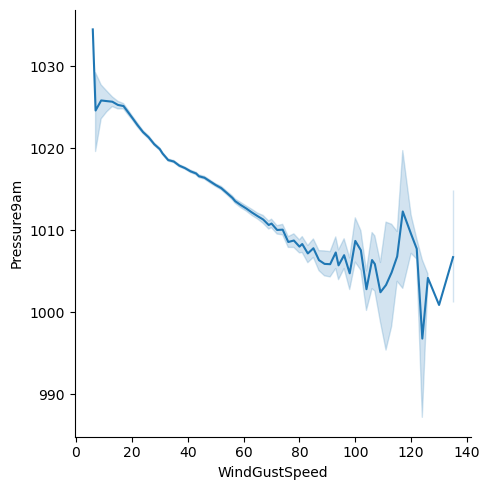

<Figure size 700x700 with 0 Axes>

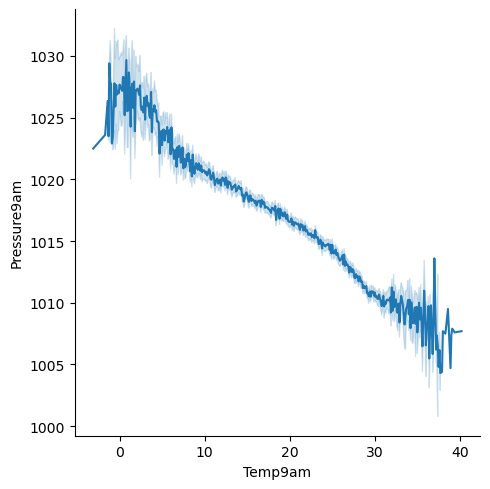

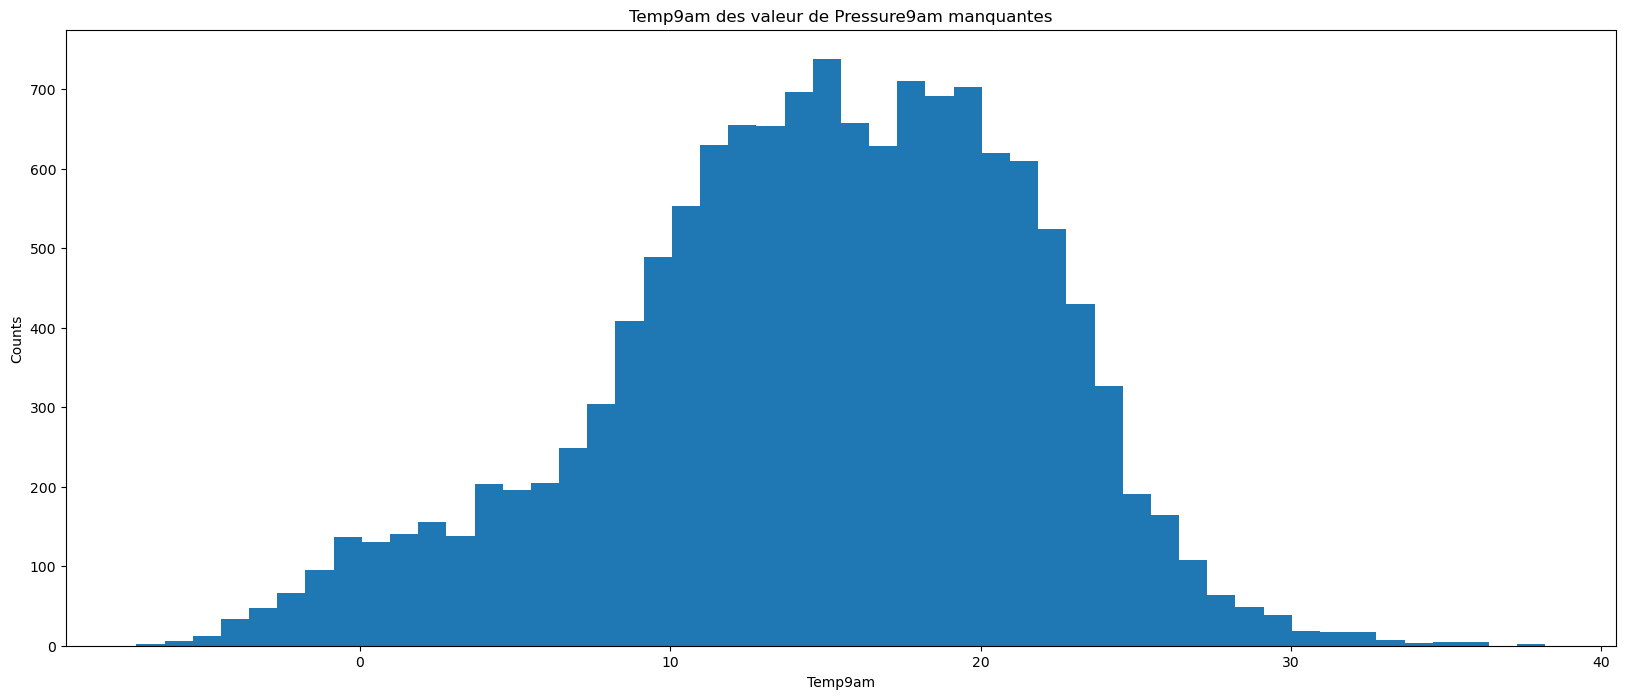

In [19]:
fig = plt.figure(figsize=(7, 7))
sns.relplot( x = 'WindGustSpeed',y = 'Pressure9am', data = df, kind ='line')
plt.xlabel('WindGustSpeed')
plt.ylabel('Pressure9am');

fig = plt.figure(figsize=(7, 7))
sns.relplot( x = 'Temp9am',y = 'Pressure9am', data = df, kind ='line')
plt.xlabel('Temp9am')
plt.ylabel('Pressure9am');

#On s'interesse √† la repartition des valeurs de temp√©ratures pour les modalit√©s manquantes de pression

fig = plt.figure(figsize=(20, 8))
temp_pressa_nan = df['Temp9am'].loc[df['Pressure9am'].isna()]
plt.hist(x = temp_pressa_nan, bins = 50),
plt.title(f"Temp9am des valeur de Pressure9am manquantes");
plt.xlabel('Temp9am')
plt.ylabel('Counts')


La temp√©rature le matin est une bonne candidate pour pr√©dire les valeurs de pressions

> Passons maintenant √† la vitesse du vent :

Il y a une correlation de ~68 % avec WindSpeed3pm

c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Counts')

<Figure size 700x700 with 0 Axes>

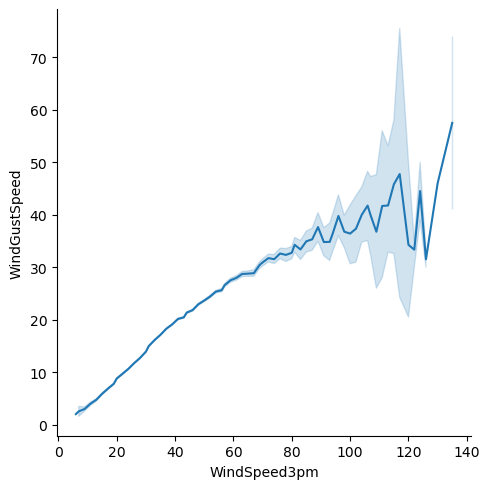

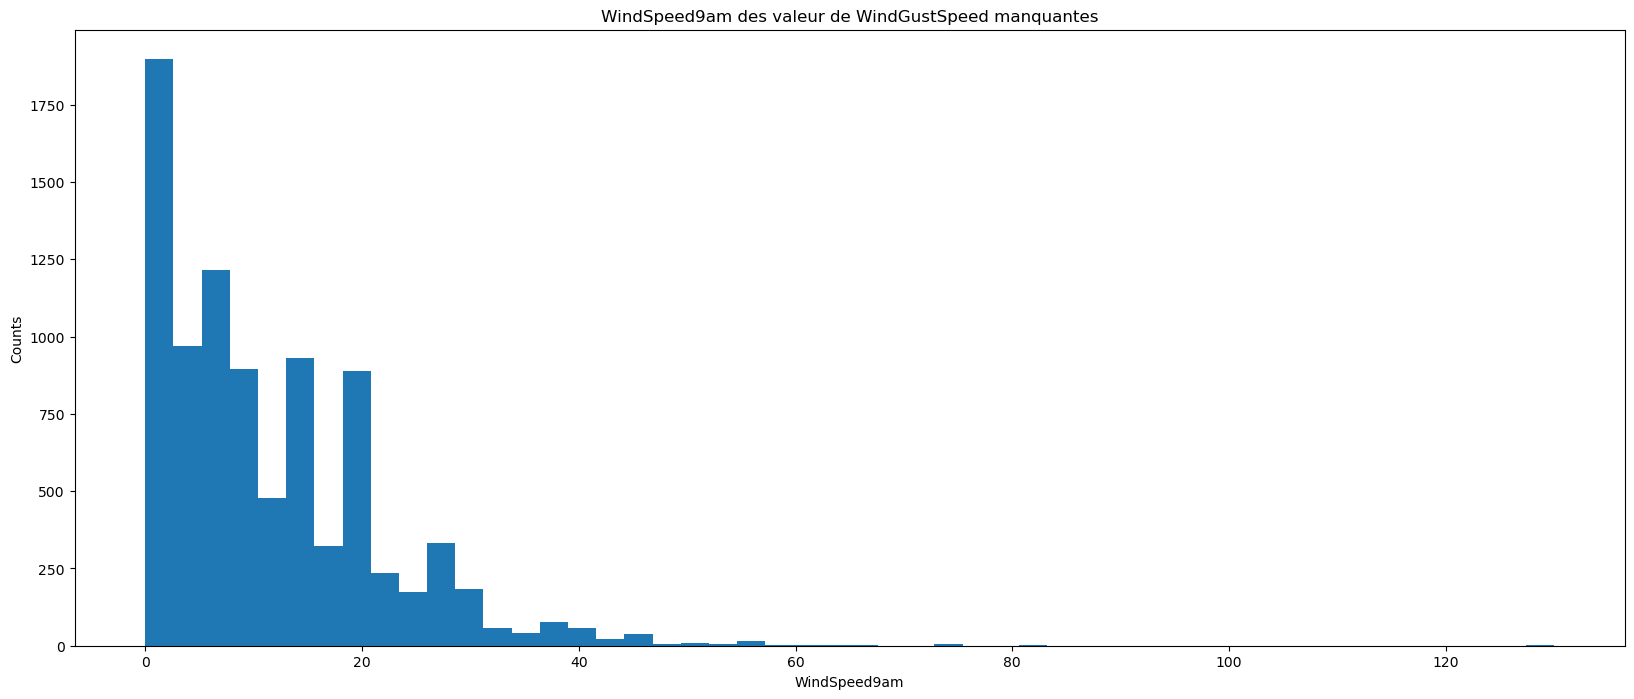

In [20]:
#plot des variables :

fig = plt.figure(figsize=(7, 7))
sns.relplot( x = 'WindGustSpeed',y = 'WindSpeed3pm', data = df, kind ='line')
plt.xlabel('WindSpeed3pm')
plt.ylabel('WindGustSpeed');

#On s'interesse √† la repartition des valeurs de WindSpeed9am pour les modalit√©s manquantes de WindGustSpeed

fig = plt.figure(figsize=(20, 8))
windm_winds_nan = df['WindSpeed9am'].loc[df['WindGustSpeed'].isna()]
plt.hist(x = windm_winds_nan, bins = 50),
plt.title(f"WindSpeed9am des valeur de WindGustSpeed manquantes");
plt.xlabel('WindSpeed9am')
plt.ylabel('Counts')

La variable WindGustSpeed devrait permettre de pr√©dire WindGustSpeed avec satisfaction.

>Il reste maintenant √† trouver une solution pour pr√©dire les variables categorielles avec beaucoup de NaN.

Il s'agit des variables WindGustDir et WindDir9am avec environ 7% de NaN
La variables cat√©gorielle WindDir3pm contient environ 3% de NaN Soit plus de 2 fois moins. Intuitivement on pourrait se dire que ces trois variables sont correl√©es puisqu'elles traitent toutes 3 de la direction du vent un m√™me jour. Il faudrait donc le verifier

> Common√ßons par WindGustSpeed:

La p-value du test d'independance de Khi-deux est de 0.000000e+00, on rejette donc H0 au profit de H1,
La valeur nulle de la p-value est peut √™tre due √† un arrondi d'une valeur extremement proche de zero, la valeur de la statistique de test √©tant tr√®s grande : 241953


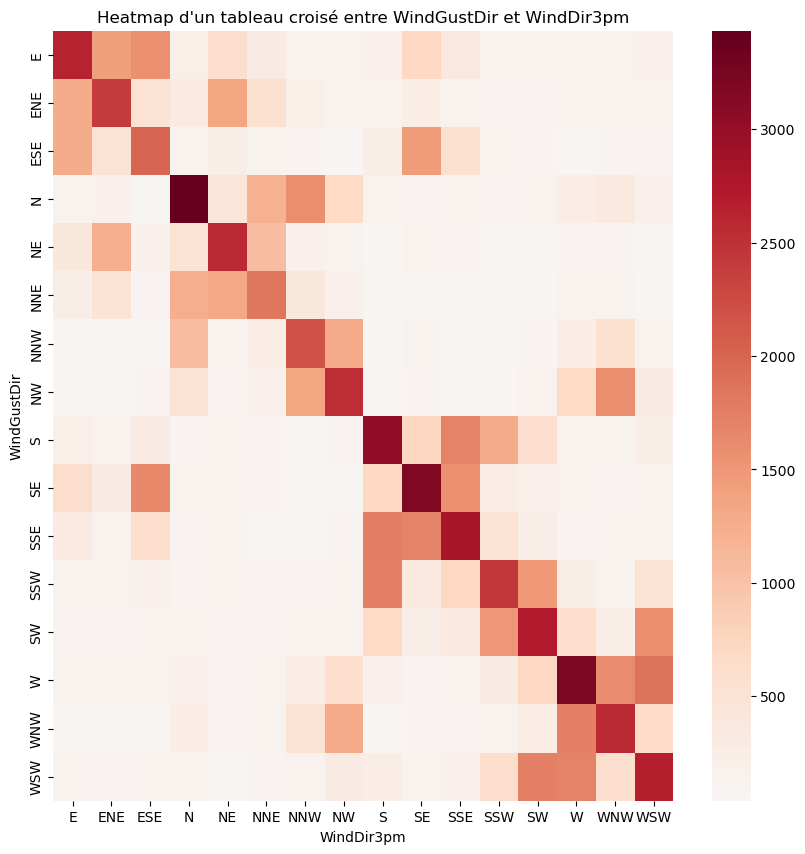

In [22]:
#On fait un tableau crois√© entre les 2 variables

fig = plt.figure(figsize=(10, 10))
sns.heatmap(pd.crosstab(df.WindGustDir, df.WindDir3pm), cmap='RdBu_r', center=0);
plt.title("Heatmap d'un tableau crois√© entre WindGustDir et WindDir3pm");

tab = pd.crosstab(df.WindGustDir, df.WindDir3pm)

## Test de Khi deux : 
## Hypoth√®ses : 
# ùêª0 : La variable WindGustDir est ind√©pendante de WindDir3pm
# H1 : La variable WindGustDir n'est pas ind√©pendante de WindDir3pm

from scipy.stats import chi2_contingency
resultats_chi2 = chi2_contingency(tab)

statistique = resultats_chi2[0]
p_valeur = resultats_chi2[1]

print(f"La p-value du test d'independance de Khi-deux est de {p_valeur:.6e}, on rejette donc H0 au profit de H1,")
print(f"La valeur nulle de la p-value est peut √™tre due √† un arrondi d'une valeur extremement proche de zero, la valeur de la statistique de test √©tant tr√®s grande : {statistique:.0f}")


> passons maintenant √† WindDir9am:

La p-value du test d'independance de Khi-deux est de 0.000000e+00, on rejette donc H0 au profit de H1,
la valeur nulle de la p-value est peut √™tre due √† un arrondi d'une valeur extremement proche de zero, la valeur de la statistique de test √©tant tr√®s grande : 81668


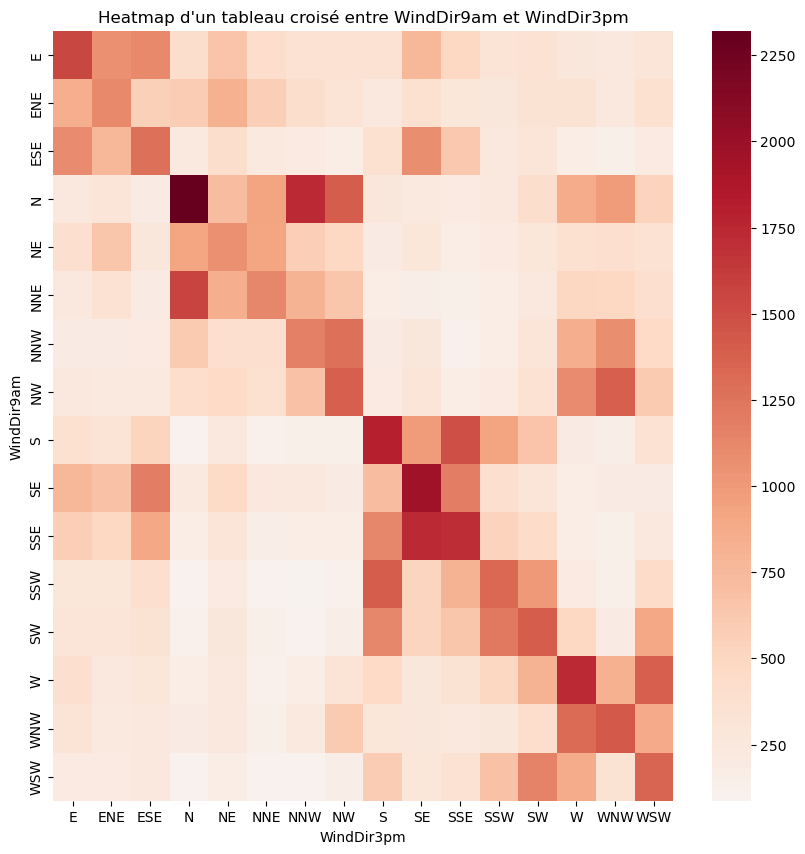

In [23]:
#On fait un tableau crois√© entre les 2 variables

fig = plt.figure(figsize=(10, 10))
sns.heatmap(pd.crosstab(df.WindDir9am, df.WindDir3pm), cmap='RdBu_r', center=0);
plt.title("Heatmap d'un tableau crois√© entre WindDir9am et WindDir3pm");

tab = pd.crosstab(df.WindDir9am, df.WindDir3pm)

## Test de Khi deux : 
## Hypoth√®ses : 
# ùêª0 : La variable WindDir9am est ind√©pendante de WindDir3pm
# H1 : La variable WindDir9am n'est pas ind√©pendante de WindDir3pm

from scipy.stats import chi2_contingency
resultats_chi2 = chi2_contingency(tab)

statistique = resultats_chi2[0]
p_valeur = resultats_chi2[1]

print(f"La p-value du test d'independance de Khi-deux est de {p_valeur:.6e}, on rejette donc H0 au profit de H1,")
print(f"la valeur nulle de la p-value est peut √™tre due √† un arrondi d'une valeur extremement proche de zero, la valeur de la statistique de test √©tant tr√®s grande : {statistique:.0f}")


Ces trois varaibles sont li√©es entre elles comme attendu.
On peut m√™me observer que les valeurs sont rapproch√©es pour des directions proches: S, SE, SSE, SSW et SW par exemple.
L√† encore c'est logique puisque le vent ne change probablement pas brutalement de sens en une journ√©e.
Il serait interessant d'introduire une notion ordinale dans cette variable cat√©gorielle pour qu'un algorithme de classification puisse prendre en compte cette proximit√©e

----------------------------------------------------------Conclusion----------------------------------------------------------------

                                                       Pour gerer les NaN:

Les variables peuvent √™tre divis√©es en 2 groupes : 

1. Celles qui ont moins de 5% de NaN. 

**Pour celles l√† on peut raisonnablement supprimer les lignes concern√©es sans perdre trop de donn√©es**

2. Celles qui ont plus de 5% de NaN.

**Pour celles l√† il serait mieux de remplacer les valeurs manquantes par une valeur coh√©rente.**



Pour cela on va s√©parer les variables avec plus de 5% de NaN en 2 groupes:


                                                   1. Les variables quantitatives

- La variable Sunshine avec presque 50% de NaN

**Peut √™tre pr√©dite avec l'humidite relative**
- La variable Evaporation avec ~40% de NaN

**Peut √™tre pr√©dite avec l'humidite relative**
- Les 2 variables de couverture nuageuse, Cloud9am et Cloud3pm avec ~40% de NaN

**Peut √™tre pr√©dite avec l'humidite relative**
- Les 2 variables de pression, Pressure9am et Pressure3pm avec ~10% de NaN

**Peut √™tre pr√©dite avec une temp√©rature**
- La variable WindGustSpeed avec ~7% de NaN

**Peut √™tre pr√©dite avec une autre vitesse de vent**

                                                    2. Les variables cat√©gorielles


- WindGustDir et WindDir9am avec environ 7% de NaN

**Devraient pouvoir √™tre pr√©dites avec WindDir3pm**



In [55]:
# Test d'un algo de classification


#Nettoyage sauvage des donn√©es :
dfs = df.dropna()




#Remplacement des valeurs d'orientation par une valeur ordinale de 0 √† 16 dans le sens trigo en commen√ßant par plein Est (correspondant √† un angle de 0)
replace = {'SW' : 10,
 'SSW' : 11,
 'S' :12,
 'SSE': 13,
 'SE': 14,
 'ESE': 15,
 'E': 0,
 'ENE': 1,
 'NE': 2,
 'NNE': 3,
 'N': 4,
 'NNW': 5,
 'NW': 6,
 'WNW':7,
 'W':8,
 'WSW':9}

dfs.WindDir3pm = dfs.WindDir3pm.replace(replace);
print(dfs.WindDir9am.unique())
dfs['sin_WindDir3pm']=np.sin(dfs['WindDir3pm']*np.pi/8)
dfs['cos_WindDir3pm']=np.cos(dfs['WindDir3pm']*np.pi/8)
data = dfs[['sin_WindDir3pm','cos_WindDir3pm']]
target = dfs.WindDir9am

['ENE' 'SSE' 'NNE' 'WNW' 'NW' 'N' 'S' 'SE' 'NE' 'W' 'SSW' 'E' 'NNW' 'ESE'
 'WSW' 'SW']


C:\Users\cedri\AppData\Local\Temp\ipykernel_9640\1169782954.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs.WindDir3pm = dfs.WindDir3pm.replace(replace);
C:\Users\cedri\AppData\Local\Temp\ipykernel_9640\1169782954.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['sin_WindDir3pm']=np.sin(dfs['WindDir3pm']*np.pi/8)
C:\Users\cedri\AppData\Local\Temp\ipykernel_9640\1169782954.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [63]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2) 
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn import svm
from sklearn import model_selection



In [61]:
clf = svm.SVC(gamma = 0.1, kernel = 'poly')

clf.fit(X_train_scaled, y_train)

SVC(gamma=0.1, kernel='poly')

In [64]:
parametres = {'C':[0.1,1,10], 'kernel': ['rbf', 'linear','poly'], 'gamma':[0.001, 0.1, 0.5]}

grid_clf = model_selection.GridSearchCV(clf, param_grid = parametres)

grid_clf.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(gamma=0.1, kernel='poly'),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.1, 0.5],
                         'kernel': ['rbf', 'linear', 'poly']})

In [65]:
y_pred = grid_clf.predict(X_test_scaled)
pd.crosstab(y_test, y_pred, rownames = ['r√©el'], colnames = ['pred'])

pred    E  ENE  ESE    N  NNE    S   SE  SSE  SSW   SW    W  WNW
r√©el                                                            
E     165  203   95   96   37   41   69   40   46   39   67   18
ENE    83  199   35  137   61   13   34   18   32   52   57   23
ESE   105  123  118   40   20   22   95   44   33   39   38   10
N      23   75   20  507   81   28   15   24   26   26  107   73
NE     31  155   24  186   87   20   22   13   18   20   85   41
NNE    20   95   14  230   78   17   12    8   18   21   84   41
NNW    14   61   15  192   26    9   40    4   17   21   95   88
NW     23   65   18  104   28   12   30   18   16   22  112   88
S      33   45   47   28    9  142   88  101   91   71   37   17
SE     74  110  104   35   17   64  166   79   40   35   24   11
SSE    54   76   99   40    6   98  163  140   60   33   26   12
SSW    24   42   29   19    9  100   41   59   93   99   59   16
SW     32   66   26   25    6   92   40   51   92  134  108   14
W      27   44   25   51   11   48   22   33   45   79  263   70
WNW    33   47   24   76    6   19   21   20   24   26  180  102
WSW    19   30   21   19    8   60   36   37   63  107  194   33